In [1]:
import pandas as pd

In [2]:
import numpy as np 
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE,ADASYN,SMOTENC
import joblib

In [3]:
df=pd.read_csv("Data\\retrived_data.csv")
df.drop("_id",inplace=True,axis=1)
df.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39.0,5,77516.0,13.0,4,0,1,4,1,2174.0,0.0,40.0,38,0
1,50.0,4,83311.0,13.0,2,3,0,4,1,0.0,0.0,13.0,38,0
2,38.0,2,215646.0,9.0,0,5,1,4,1,0.0,0.0,40.0,38,0
3,53.0,2,234721.0,7.0,2,5,0,2,1,0.0,0.0,40.0,38,0
4,28.0,2,338409.0,13.0,2,9,5,2,0,0.0,0.0,40.0,4,0


In [4]:
column_names=['age','workclass',"fnlwgt","education",'education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','class']

In [5]:
df_test=pd.read_csv("Data\\adult.test",names=column_names)
df_test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [6]:
numeric_features = [feature for feature in df_test.columns if df_test[feature].dtype != 'O']
categorical_features = [feature for feature in df_test.columns if df_test[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 6 numerical features : ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

We have 9 categorical features : ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'class']


In [7]:
## Strip the categorical feature columns
for i in categorical_features:
    df_test[i]=df_test[i].str.strip()

In [8]:
 for i in categorical_features:
    print(i,">>>  ",df_test[i].unique(),"\n")

workclass >>>   ['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked'] 

education >>>   ['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool'] 

marital-status >>>   ['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse'] 

occupation >>>   ['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' '?'
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Transport-moving' 'Handlers-cleaners' 'Armed-Forces'] 

relationship >>>   ['Own-child' 'Husband' 'Not-in-family' 'Unmarried' 'Wife' 'Other-relative'] 

race >>>   ['Black' 'White' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo'] 

sex >>>   ['Male' 'Female'] 

native-country >>>   ['United-States' '?' 'Peru' 'Guatemala' 'Mexic

In [9]:
for i in df_test.columns:
    l=["?"," "]
    df_test[i] =np.where(df_test[i]=="?",np.nan,df_test[i])

In [10]:
df_test

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25.0,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
1,38.0,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
2,28.0,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
3,44.0,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
4,18.0,NaN,103497.0,Some-college,10.0,Never-married,NaN,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39.0,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K
16277,64.0,NaN,321403.0,HS-grad,9.0,Widowed,NaN,Other-relative,Black,Male,0.0,0.0,40.0,United-States,<=50K
16278,38.0,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
16279,44.0,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K


In [11]:
df

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39.0,5,77516.0,13.0,4,0,1,4,1,2174.0,0.0,40.0,38,0
1,50.0,4,83311.0,13.0,2,3,0,4,1,0.0,0.0,13.0,38,0
2,38.0,2,215646.0,9.0,0,5,1,4,1,0.0,0.0,40.0,38,0
3,53.0,2,234721.0,7.0,2,5,0,2,1,0.0,0.0,40.0,38,0
4,28.0,2,338409.0,13.0,2,9,5,2,0,0.0,0.0,40.0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62671,27.0,3,257302.0,12.0,2,12,5,4,0,0.0,0.0,38.0,38,0
62672,40.0,3,154374.0,9.0,2,6,0,4,1,0.0,0.0,40.0,38,1
62673,58.0,3,151910.0,9.0,6,0,4,4,0,0.0,0.0,40.0,38,0
62674,22.0,3,201490.0,9.0,4,0,3,4,1,0.0,0.0,20.0,38,0


In [12]:
df_test.isna().sum()/df.shape[0]*100

age               0.000000
workclass         1.536473
fnlwgt            0.000000
education         0.000000
education-num     0.000000
marital-status    0.000000
occupation        1.541260
relationship      0.000000
race              0.000000
sex               0.000000
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.000000
native-country    0.437169
class             0.000000
dtype: float64

In [13]:
df_test.duplicated().sum()

5

In [14]:
df_test=df_test.drop_duplicates()
df_test_copy=df_test.copy()
df_test=df_test.dropna()
print("Dataframe wiht missing values >> ",df_test_copy.shape)
print("Dataframe without missing values >> ",df_test.shape)

Dataframe wiht missing values >>  (16276, 15)
Dataframe without missing values >>  (15055, 15)


In [15]:
df_test.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64

In [16]:
categorical_features.sort()
categorical_features

['class',
 'education',
 'marital-status',
 'native-country',
 'occupation',
 'race',
 'relationship',
 'sex',
 'workclass']

In [17]:
import glob
import os
files=glob.glob("*.joblib")
files.sort()
files

['class.joblib',
 'marital-status.joblib',
 'native-country.joblib',
 'occupation.joblib',
 'race.joblib',
 'relationship.joblib',
 'sex.joblib',
 'workclass.joblib']

In [18]:
data =joblib.load('sex.joblib')
df_test['sex']=data.transform(df_test['sex'])


In [19]:
data =joblib.load('workclass.joblib')
df_test['workclass']=data.transform(df_test['workclass'])
data =joblib.load('relationship.joblib')
df_test['relationship']=data.transform(df_test['relationship'])
data =joblib.load('race.joblib')
df_test['race']=data.transform(df_test['race'])

In [20]:
data =joblib.load('class.joblib')
df_test['class']=data.transform(df_test['class'])


In [21]:
data =joblib.load('occupation.joblib')
df_test['occupation']=data.transform(df_test['occupation'])
data =joblib.load('native-country.joblib')
df_test['native-country']=data.transform(df_test['native-country'])
data =joblib.load('marital-status.joblib')
df_test['marital-status']=data.transform(df_test['marital-status'])


In [22]:
df_test.drop('education',axis=1,inplace=True)

In [23]:
df_test.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25.0,3,226802.0,7.0,4,6,3,2,1,0.0,0.0,40.0,38,0
1,38.0,3,89814.0,9.0,2,4,0,4,1,0.0,0.0,50.0,38,0
2,28.0,1,336951.0,12.0,2,10,0,4,1,0.0,0.0,40.0,38,1
3,44.0,3,160323.0,10.0,2,6,0,2,1,7688.0,0.0,40.0,38,1
5,34.0,3,198693.0,6.0,4,7,1,4,1,0.0,0.0,30.0,38,0


In [24]:
df.corr()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
age,1.000000,0.061650,-0.076353,0.039450,-0.270769,0.004621,-0.255523,0.026616,0.085421,0.078827,0.058856,0.083618,-0.001359,0.237685
workclass,0.061650,1.000000,-0.021212,-0.022435,0.017620,0.210819,-0.010512,0.021877,0.022229,0.016916,-0.003888,-0.046383,0.006020,-0.029313
fnlwgt,-0.076353,-0.021212,1.000000,-0.044253,0.030038,-0.000398,0.009043,-0.022733,0.026375,0.000425,-0.010017,-0.020848,-0.064428,-0.009254
education-num,0.039450,-0.022435,-0.044253,1.000000,-0.066420,0.063570,-0.093441,0.032547,0.009321,0.123524,0.079765,0.150621,0.089953,0.335372
marital-status,-0.270769,0.017620,0.030038,-0.066420,1.000000,0.039311,0.182018,-0.068316,-0.124908,-0.042907,-0.034639,-0.189854,-0.022589,-0.196477
occupation,0.004621,0.210819,-0.000398,0.063570,0.039311,1.000000,-0.032125,-0.005445,0.042543,0.016793,0.009087,-0.023721,-0.001396,0.029089
relationship,-0.255523,-0.010512,0.009043,-0.093441,0.182018,-0.032125,1.000000,-0.116613,-0.583784,-0.058115,-0.062311,-0.253160,-0.010942,-0.251041
race,0.026616,0.021877,-0.022733,0.032547,-0.068316,-0.005445,-0.116613,1.000000,0.088448,0.012696,0.021133,0.045172,0.117878,0.071831
sex,0.085421,0.022229,0.026375,0.009321,-0.124908,0.042543,-0.583784,0.088448,1.000000,0.048653,0.046269,0.230172,0.001486,0.216349
capital-gain,0.078827,0.016916,0.000425,0.123524,-0.042907,0.016793,-0.058115,0.012696,0.048653,1.000000,-0.031935,0.079358,0.009060,0.222301


In [25]:
df['class'].value_counts()/df.shape[0]*100

0    75.516944
1    24.483056
Name: class, dtype: float64

In [26]:
# Both the train data and the test data is imbalanced 

In [27]:
df_test['class'].value_counts()/df_test.shape[0]*100

0    75.423447
1    24.576553
Name: class, dtype: float64

In [28]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
X
   

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39.0,5,77516.0,13.0,4,0,1,4,1,2174.0,0.0,40.0,38
1,50.0,4,83311.0,13.0,2,3,0,4,1,0.0,0.0,13.0,38
2,38.0,2,215646.0,9.0,0,5,1,4,1,0.0,0.0,40.0,38
3,53.0,2,234721.0,7.0,2,5,0,2,1,0.0,0.0,40.0,38
4,28.0,2,338409.0,13.0,2,9,5,2,0,0.0,0.0,40.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62671,27.0,3,257302.0,12.0,2,12,5,4,0,0.0,0.0,38.0,38
62672,40.0,3,154374.0,9.0,2,6,0,4,1,0.0,0.0,40.0,38
62673,58.0,3,151910.0,9.0,6,0,4,4,0,0.0,0.0,40.0,38
62674,22.0,3,201490.0,9.0,4,0,3,4,1,0.0,0.0,20.0,38


### Scaling the Data using Standard Scaler


In [29]:
from joblib import dump, load
scaler=StandardScaler()
Scaled=scaler.fit(X)
with open("standardscalar.joblib","wb") as file:
    joblib.dump(Scaled,file)


In [30]:
scaler=joblib.load('standardscalar.joblib')
scaler

StandardScaler()

In [31]:
# Scaling the train data
X_train_scaled=scaler.transform(X)
X_train_sc_df=pd.DataFrame(X_train_scaled,columns=df.columns[:-1])

In [32]:
# Test Data Sampling & Scaling
X_test = df_test.iloc[:,:-1]
y_test = df_test.iloc[:,-1]

In [33]:
X_test_scaled=scaler.transform(X_test)
X_test_sc_df=pd.DataFrame(X_test_scaled,columns=df_test.columns[:-1])

### Logistic Regression 

In [34]:
log_model=LogisticRegression()
log_model.fit(X_train_sc_df,y)

LogisticRegression()

#### Model training without over sampling 

In [35]:
y_pred=log_model.predict(X_test_sc_df)

In [36]:
### Evaluation of the model
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,auc,roc_curve

In [37]:
cnf=confusion_matrix(y_test,y_pred)
print("Confusion Metrics \n",cnf)
report=classification_report(y_test,y_pred)
print('CLassification Report \n',report)

Confusion Metrics 
 [[10687   668]
 [ 2043  1657]]
CLassification Report 
               precision    recall  f1-score   support

           0       0.84      0.94      0.89     11355
           1       0.71      0.45      0.55      3700

    accuracy                           0.82     15055
   macro avg       0.78      0.69      0.72     15055
weighted avg       0.81      0.82      0.80     15055



In [38]:
#'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'

In [39]:
from sklearn.model_selection import RepeatedStratifiedKFold
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = [ 'l2',]
c_values = [100, 10, 1.0, 0.1, 0.01,]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=15, n_repeats=5, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid,cv=cv, n_jobs=-1, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train_sc_df, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.823313 using {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
0.823186 (0.004244) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.823186 (0.004244) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.823183 (0.004243) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.823183 (0.004247) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.823183 (0.004247) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.823183 (0.004247) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.823176 (0.004239) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.823176 (0.004230) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.823176 (0.004234) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.823154 (0.004241) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.823154 (0.004241) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.823138 (0.004232) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.823125 (0.004096) wi

#### Model training with over Sampling

In [40]:
# Since the Data is Unequally Distributed
# We have to user Over Sampling
smote=SMOTE(sampling_strategy=0.4)
X_sample,y_sample=smote.fit_resample(X_train_sc_df,y)

In [41]:
y.value_counts()

0    47331
1    15345
Name: class, dtype: int64

In [42]:
y_sample.value_counts()


0    47331
1    18932
Name: class, dtype: int64

In [43]:
log_model=LogisticRegression()
log_model.fit(X_sample,y_sample)

LogisticRegression()

In [44]:
y_pred=log_model.predict(X_test_sc_df)
y_pred

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [45]:
y_pred_proba=log_model.predict_proba(X_test_sc_df)[:,1]

In [46]:
cnf=confusion_matrix(y_test,y_pred)
print("Confusion Metrics \n",cnf)
report=classification_report(y_test,y_pred)
print('CLassification Report \n',report)

Confusion Metrics 
 [[10434   921]
 [ 1836  1864]]
CLassification Report 
               precision    recall  f1-score   support

           0       0.85      0.92      0.88     11355
           1       0.67      0.50      0.57      3700

    accuracy                           0.82     15055
   macro avg       0.76      0.71      0.73     15055
weighted avg       0.81      0.82      0.81     15055



###  Precision Recall Curve

In [47]:
from sklearn.model_selection import cross_val_predict

In [48]:
# We first need to get the y_scores of all the samples 
# for that we will be using cross val_predict 
y_scores=cross_val_predict(log_model,X_train_sc_df,y,cv=5,method='decision_function')

In [49]:
#y_scores=log_model.predict_proba(X_train_sc_df)

In [50]:
from sklearn.metrics import precision_recall_curve
precisions,recalls,thresholds =precision_recall_curve(y_test,y_pred_proba)

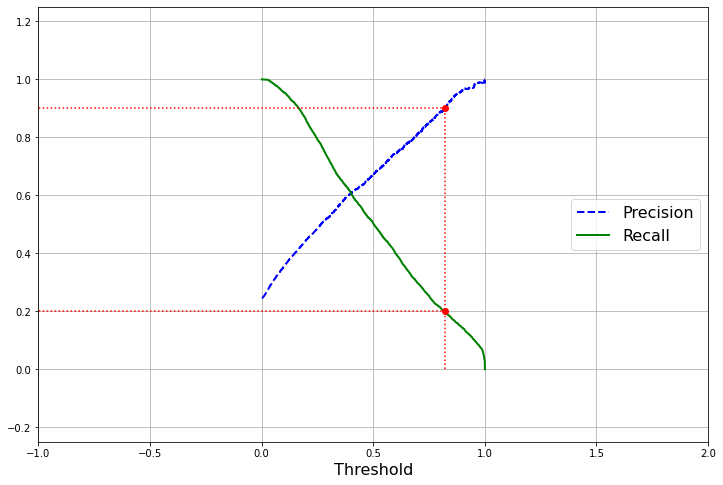

In [51]:
import  matplotlib.pyplot as plt 
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([-1, 2, -0.25, 1.25])             # Not shown



recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]


plt.figure(figsize=(12, 8))                                                                  # Not shown
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 # Not shown
plt.plot([-20, threshold_90_precision], [0.9, 0.9], "r:")                                # Not shown
plt.plot([-20, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")# Not shown
plt.plot([threshold_90_precision], [0.9], "ro")                                             # Not shown
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             # Not shown
#save_fig("precision_recall_vs_threshold_plot")                                              # Not shown
plt.show()

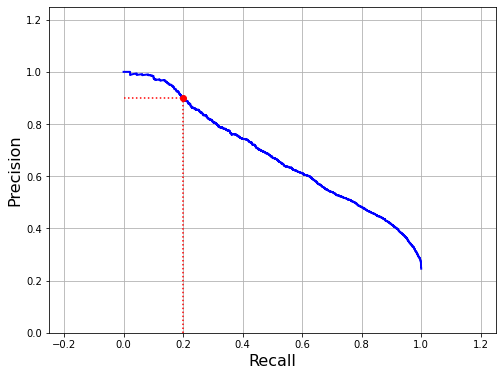

In [52]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([-0.25, 1.25, 0, 1.25])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([recall_90_precision, recall_90_precision], [0., 0.9], "r:")
plt.plot([0.0, recall_90_precision], [0.9, 0.9], "r:")
plt.plot([recall_90_precision], [0.9], "ro")

plt.show()

In [53]:
threshold_90_precision

0.8202386951844234

In [54]:
fpr,tpr,thresholds =roc_curve(y_test,y_pred_proba)

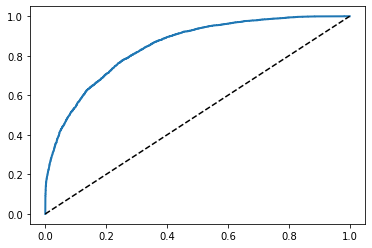

In [55]:
def plot_roc_auc_curve(fpr,tpr):
    plt.plot(fpr,tpr,linewidth=2,)
    plt.plot([0,1],[0,1],'k--')
plot_roc_auc_curve(fpr,tpr)
plt.show()

In [56]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

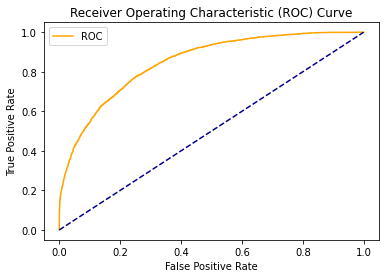

In [57]:
plot_roc_curve(fpr,tpr)

In [58]:
roc_auc_score(y_test,y_pred_proba)

0.8481112856581814

### SVM 

#### without hyperparameter tuning  

In [59]:
from sklearn.svm import SVC

In [60]:
svc_model=SVC()

svc_model.fit(X_train_sc_df,y)

SVC()

In [61]:
y_pred_svc=svc_model.predict(X_test_sc_df)


In [62]:
y_pred_svc

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [63]:
y_pred_svc_decision=svc_model.decision_function(X_test_sc_df)

In [64]:
cnf=confusion_matrix(y_test,y_pred_svc)
print("Confusion Metrics \n",cnf)
report=classification_report(y_test,y_pred_svc)
print('CLassification Report \n',report)

Confusion Metrics 
 [[10725   630]
 [ 1696  2004]]
CLassification Report 
               precision    recall  f1-score   support

           0       0.86      0.94      0.90     11355
           1       0.76      0.54      0.63      3700

    accuracy                           0.85     15055
   macro avg       0.81      0.74      0.77     15055
weighted avg       0.84      0.85      0.84     15055



In [65]:
y_pred_svc_decision

array([-1.61897004, -0.97995704, -0.3989372 , ...,  0.89695726,
       -0.66310788,  0.47816272])

In [66]:
fpr,tpr,thresholds =roc_curve(y_test,y_pred_svc_decision)

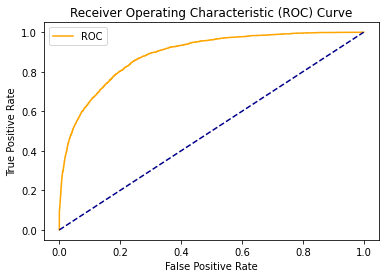

In [67]:
plot_roc_curve(fpr,tpr)

In [68]:
roc_auc_score(y_test,y_pred_svc_decision)

0.8881044069168242

- The area under the curve and also the accuracy of the svm model is better 

### Hyperparameter tuning  

In [ ]:
model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
#C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']
# define grid search
grid = dict(kernel=kernel,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=15, n_repeats=5, random_state=1)
random_search = RandomizedSearchCV(estimator=model,cv=cv, param_distributions=grid, n_jobs=-1, scoring='accuracy',error_score=0)
random_result = random_search.fit(X_train_sc_df,y)
# summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))
means = random_result.cv_results_['mean_test_score']
stds = random_result.cv_results_['std_test_score']
params = random_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

C:\Users\rajes\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [ ]:
import os
os.getcwd()